# Digit Recognition

Digit racognition using CNN.

I am using data from analytics vidya digit recognition competition.

## Importing required libraries

In [2]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns

* **pandas** - we use pandas to handle our csv files
* **matplotlib & seaborn** - used for charting and plotting

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

* **sklearn** - Popular ML library.We will use it for splitting our data.

In [4]:
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout,BatchNormalization
from keras.optimizers import RMSprop,Adam
from keras.callbacks import ReduceLROnPlateau

* **Keras** : Popular Deep learning library,we will use it to build our CNN Network.

## Loading data

In [5]:

train_X = pd.read_csv('../input/digit-recognition-dataset/Digit Recognition/trian_data1.csv')
test_X = pd.read_csv('../input/digit-recognition-dataset/Digit Recognition/test_data1.csv')
train_y = pd.read_csv('../input/digit-recognition-dataset/Digit Recognition/train.csv')
test= pd.read_csv('../input/digit-recognition-dataset/Digit Recognition/Test.csv')
sample_sub = pd.read_csv('../input/digit-recognition-dataset/Digit Recognition/Sample_submission.csv')

## Understanding the train and test data

In [6]:
print('Train dataset has {} rows and {} columns'.format(train_X.shape[0],train_X.shape[1]))
print('test dataset has {} rows and {} columns'.format(test_X.shape[0],test_X.shape[1]))


Train dataset has 48999 rows and 784 columns
test dataset has 20999 rows and 784 columns


In [7]:
train_X.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.591,0.592,0.593,0.594,0.595,0.596,0.597,0.598,0.599,0.600
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
test_X.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.603,0.604,0.605,0.606,0.607,0.608,0.609,0.610,0.611,0.612
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Pixel 0 to Pixel 783**: These are the pixel values of the image metrics.That is each row contains 28 * 28 = 784 (0-783 here) values here.Each one of these values indicates the pixel value at i x 28 + j th pixel position in the image metric.

**train_y** file contains a target value i.e **label** for train data


In [9]:
train_y.head()
train_y = train_y.iloc[:,1]


In [10]:

train_y.head()


0    9
1    2
2    7
3    7
4    0
Name: 4, dtype: int64

## Checking Target class distribution.

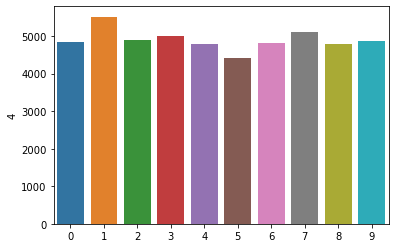

In [11]:
y = train_y.value_counts()
sns.barplot(y.index,y)


## Normalize pixel values

For most image data, the pixel values are integers with values between 0 and 255.

Neural networks process inputs using small weight values, and inputs with large integer values can disrupt or slow down the learning process. As such it is good practice to normalize the pixel values so that each pixel value has a value between 0 and 1.

It is valid for images to have pixel values in the range 0-1 and images can be viewed normally.

This can be achieved by dividing all pixels values by the largest pixel value; that is 255. This is performed across all channels, regardless of the actual range of pixel values that are present in the image.

In [12]:
train_X = train_X /255
test_X =test_X /255

## Reshape

In [13]:
train_X= train_X.values.reshape(-1,28,28,1)
test_X = test_X.values.reshape(-1,28,28,1)


In [14]:
print('The shape of train set now is',train_X.shape)
print('The shape of test set now is',test_X.shape)

The shape of train set now is (48999, 28, 28, 1)
The shape of test set now is (20999, 28, 28, 1)


## Encoding Target Values



Now we will encode our target value.Keras inbuild library to_categorical() is used to do the on-hot encoding.

In [15]:
train_y = to_categorical(train_y)

## Splitting train and test data

Now we will split out training data into train and validation data. 20 percent of the training data will be used for validation purpose.

In [16]:
X_train,X_test,y_train,y_test = train_test_split(train_X,train_y,random_state = 42 , test_size=0.20)

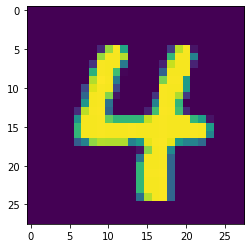

In [17]:
plt.imshow(X_train[0][:,:,0])

## Generating more data

In order to avoid overfitting problem , we need to expand our dataset artificially.

We can do it by some **data augmentation techniques**.

By applying these techniques we can double or triple the number of training examples and create a very robust model.

In [18]:
datagen = ImageDataGenerator(
            featurewise_center = False, # set input mean to 0 over the dataset
            samplewise_center = False,  # set each sample mean to 0
            featurewise_std_normalization = False, # divide inputs by std of the dataset
            samplewise_std_normalization = False,  # divide each input by its std
            zca_whitening = False,   # apply ZCA whitening
            rotation_range = 10,     # randomly rotate images in the range (degrees, 0 to 180)
            zoom_range = 0.1,       # Randomly zoom image 
            width_shift_range = 0.1,  # randomly shift images horizontally (fraction of total width)
            height_shift_range = 0.1, # randomly shift images vertically (fraction of total height)
            horizontal_flip = False,  # randomly flip images
            vertical_flip = False     # randomly flip images
)

datagen.fit(X_train)

I did not apply a vertical_flip nor horizontal_flip since it could have lead to misclassify symetrical numbers such as 6 and 9.

## Modelling

### CNN

In [19]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu'))

model.add(BatchNormalization(momentum = .05))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(BatchNormalization(momentum=0.05))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model.add(BatchNormalization(momentum=.05))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation = "softmax"))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        3

## Optimizer


In simpler terms, optimizers shape and mold your model into its most accurate possible form by futzing with the weights. The loss function is the guide to the terrain, telling the optimizer when it’s moving in the right or wrong direction.

In [21]:
optimizer = Adam(learning_rate=0.001 , beta_1=0.9 ,beta_2 = 0.999)

In [22]:
model.compile(optimizer=optimizer , loss=['categorical_crossentropy'],metrics = ['accuracy'])


## Leraning rate reduction



In order to make the optimizer converge faster and closest to the global minimum of the loss function, i used an annealing method of the learning rate (LR).

With the ReduceLROnPlateau function from Keras.callbacks, i choose to reduce the LR by half if the accuracy is not improved after 3 epochs.

In [23]:
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_acc',
                                            patience = 5 ,
                                            verbose = 1,
                                            factor = 0.5 , 
                                            min_lr = 0.00001)


## Fitting Our Model

In [24]:
epochs = 20
batch_size = 100

In [25]:
history = model.fit_generator(datagen.flow(X_train,y_train,batch_size = batch_size),
                              epochs = epochs ,
                              validation_data = (X_test,y_test),
                              verbose = 2,
                              steps_per_epoch = X_train.shape[0]//batch_size,
                              callbacks =[learning_rate_reduction])


Epoch 1/20
391/391 - 12s - loss: 0.4894 - accuracy: 0.8462 - val_loss: 0.0628 - val_accuracy: 0.9785
Epoch 2/20
391/391 - 12s - loss: 0.1183 - accuracy: 0.9647 - val_loss: 0.0369 - val_accuracy: 0.9885
Epoch 3/20
391/391 - 12s - loss: 0.0886 - accuracy: 0.9737 - val_loss: 0.0364 - val_accuracy: 0.9888
Epoch 4/20
391/391 - 13s - loss: 0.0754 - accuracy: 0.9778 - val_loss: 0.0278 - val_accuracy: 0.9922
Epoch 5/20
391/391 - 12s - loss: 0.0676 - accuracy: 0.9800 - val_loss: 0.0329 - val_accuracy: 0.9900
Epoch 6/20
391/391 - 12s - loss: 0.0582 - accuracy: 0.9829 - val_loss: 0.0269 - val_accuracy: 0.9918
Epoch 7/20
391/391 - 12s - loss: 0.0506 - accuracy: 0.9847 - val_loss: 0.0382 - val_accuracy: 0.9891
Epoch 8/20
391/391 - 12s - loss: 0.0498 - accuracy: 0.9852 - val_loss: 0.0344 - val_accuracy: 0.9908
Epoch 9/20
391/391 - 13s - loss: 0.0498 - accuracy: 0.9858 - val_loss: 0.0300 - val_accuracy: 0.9911
Epoch 10/20
391/391 - 12s - loss: 0.0464 - accuracy: 0.9863 - val_loss: 0.0252 - val_accura

## Evaluatin our approach using graph

Text(0, 0.5, 'accuracy')

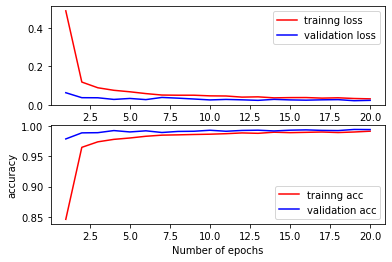

In [26]:
fig,ax=plt.subplots(2,1)
fig.set
x=range(1,1+epochs)
ax[0].plot(x,history.history['loss'],color='red')
ax[0].plot(x,history.history['val_loss'],color='blue')

ax[1].plot(x,history.history['accuracy'],color='red')
ax[1].plot(x,history.history['val_accuracy'],color='blue')
ax[0].legend(['trainng loss','validation loss'])
ax[1].legend(['trainng acc','validation acc'])
plt.xlabel('Number of epochs')
plt.ylabel('accuracy')

## Confusion Matrix

In [27]:
y_pre_test=model.predict(X_test)
y_pre_test=np.argmax(y_pre_test,axis=1)
y_test=np.argmax(y_test,axis=1)

In [28]:
conf=confusion_matrix(y_test,y_pre_test)
conf=pd.DataFrame(conf,index=range(0,10),columns=range(0,10))

In [29]:


conf



,0,1,2,3,4,5,6,7,8,9
0,978,1,0,0,0,0,0,0,0,0
1,0,1125,0,0,0,1,0,2,0,0
2,0,1,924,0,0,0,0,0,0,0
3,0,0,0,1010,0,2,0,0,1,1
4,0,1,0,0,927,0,0,0,0,2
5,0,0,0,4,0,842,5,0,2,1
6,0,0,0,0,3,1,934,0,0,0
7,0,1,5,2,0,0,0,986,0,1
8,0,0,3,0,1,1,2,0,1016,1
9,0,0,0,0,10,4,0,0,1,998


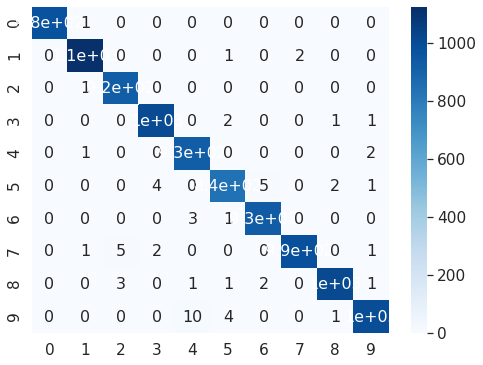

In [30]:
plt.figure(figsize=(8,6))
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf, annot=True,annot_kws={"size": 16},cmap=plt.cm.Blues)# font size

## Some Misclassified Images

In [31]:
x=(y_pre_test-y_test!=0).tolist()
x=[i for i,l in enumerate(x) if l!=False]

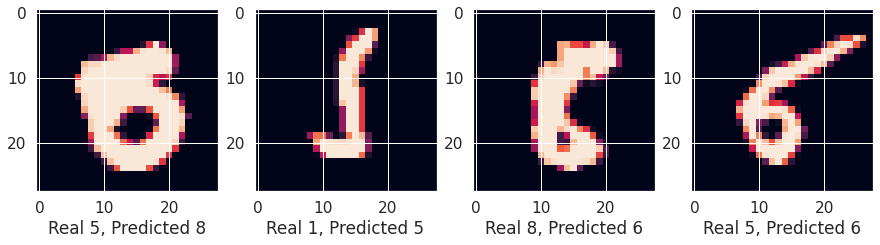

In [32]:
fig,ax=plt.subplots(1,4,sharey=False,figsize=(15,15))

for i in range(4):
    ax[i].imshow(X_test[x[i]][:,:,0])
    ax[i].set_xlabel('Real {}, Predicted {}'.format(y_test[x[i]],y_pre_test[x[i]]))
    

## Predicting for test data

In [33]:
y_pre_test

array([2, 2, 7, ..., 4, 9, 9])

In [34]:
test_y = model.predict(test_X)
test_y =np.argmax(test_y,axis=1)


In [35]:
test_y

array([0, 9, 7, ..., 6, 6, 2])

In [36]:
test1 = test

In [37]:
test1 = test1.iloc[:,0:1]

In [38]:
test1

,filename
0,49000.png
1,49001.png
2,49002.png
3,49003.png
4,49004.png
...,...
20995,69995.png
20996,69996.png
20997,69997.png
20998,69998.png


In [39]:
output = pd.DataFrame({'filename': test1.iloc[1:,0],
                     'label': test_y})
output.to_csv('submission1.csv', index=False)

Reference and credit:

1.[Analytics Vidya](http://www.analyticsvidhya.com/blog/2018/12/guide-convolutional-neural-network-cnn/)

2.[Kaggle notebook](http://www.kaggle.com/shahules/indian-way-to-learn-cnn)

